In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

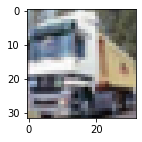

In [14]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [17]:
y_train.shape

(50000, 1)

In [15]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
classes[9]

'truck'

In [22]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

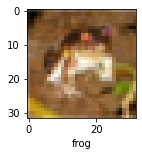

In [23]:
plot_sample(X_train, y_train, 0)

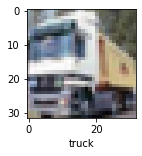

In [25]:
plot_sample(X_train, y_train, 1)

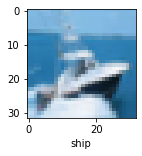

In [27]:
plot_sample(X_train, y_train, 8)

In [29]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [37]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer='SGD',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.8110 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6245 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5405 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4815 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4324 - accuracy: 0.4946


In [39]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.6060 - accuracy: 0.4285


[1.6060394048690796, 0.4284999966621399]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 24ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.40      0.46      1000
           1       0.73      0.34      0.46      1000
           2       0.46      0.15      0.22      1000
           3       0.42      0.18      0.25      1000
           4       0.30      0.65      0.41      1000
           5       0.40      0.37      0.39      1000
           6       0.45      0.60      0.51      1000
           7       0.58      0.48      0.53      1000
           8       0.35      0.86      0.50      1000
           9       0.74      0.25      0.37      1000

    accuracy                           0.43     10000
   macro avg       0.50      0.43      0.41     10000
weighted avg       0.50      0.43      0.41     10000



### Use CNN

In [42]:
cnn= models.Sequential([
    
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [43]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [44]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4412 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0889 - accuracy: 0.6185
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9583 - accuracy: 0.6661
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8723 - accuracy: 0.6976
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8006 - accuracy: 0.7223
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7455 - accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6912 - accuracy: 0.7588
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6464 - accuracy: 0.7765
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6106 - accuracy: 0.7869
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [45]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9633 - accuracy: 0.6955


[0.9632902145385742, 0.6955000162124634]

In [46]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [48]:
y_test = y_test.reshape(-1, )

y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

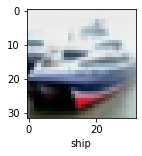

In [49]:
plot_sample(X_test, y_test, 1)

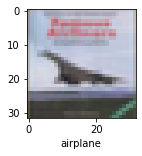

In [50]:
plot_sample(X_test, y_test, 3)

In [52]:
y_preds = model.predict(X_test)

y_preds[:5]

313/313 [==============================] - 7s 23ms/step


array([[0.4350287 , 0.5619607 , 0.5553304 , 0.6163373 , 0.5741296 ,
        0.37995455, 0.4412203 , 0.5241632 , 0.36355248, 0.5332554 ],
       [0.51992315, 0.64465714, 0.43054798, 0.66321504, 0.57797325,
        0.3023338 , 0.40043956, 0.47559005, 0.32671198, 0.60121834],
       [0.57918775, 0.6599544 , 0.48160648, 0.6426956 , 0.6136351 ,
        0.35705718, 0.42185053, 0.39687327, 0.33531225, 0.58368975],
       [0.47878295, 0.63772154, 0.45215622, 0.66999614, 0.55146486,
        0.2663494 , 0.3918525 , 0.47342464, 0.2740189 , 0.49286535],
       [0.46822244, 0.6222553 , 0.49727732, 0.561329  , 0.56117904,
        0.33460173, 0.38987014, 0.44339278, 0.33728752, 0.52733284]],
      dtype=float32)

In [54]:
np.argmax(y_preds[0])

3

In [55]:
y_classes = [np.argmax(element) for element in y_pred]

In [57]:
y_classes[:5]

[3, 8, 8, 8, 4]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

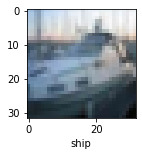

In [66]:
plot_sample(X_test, y_test, 2)

In [65]:
classes[y_classes[2]]

'ship'

In [67]:
print("Classification Report : \n", classification_report(y_test, y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.40      0.46      1000
           1       0.73      0.34      0.46      1000
           2       0.46      0.15      0.22      1000
           3       0.42      0.18      0.25      1000
           4       0.30      0.65      0.41      1000
           5       0.40      0.37      0.39      1000
           6       0.45      0.60      0.51      1000
           7       0.58      0.48      0.53      1000
           8       0.35      0.86      0.50      1000
           9       0.74      0.25      0.37      1000

    accuracy                           0.43     10000
   macro avg       0.50      0.43      0.41     10000
weighted avg       0.50      0.43      0.41     10000

